In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

player_totals = pd.read_csv("Data/Player Totals.csv")
player_shootings = pd.read_csv("Data/Player Shooting.csv")
player_by_play = pd.read_csv("Data/Player Play By Play.csv")
player_career = pd.read_csv("Data/Player Career Info.csv")
player_game_original = pd.read_csv("Data/Player Per Game.csv")
player_award = pd.read_csv("Data/Player Award Shares.csv")

player_game_original.head()
player_career.head(
    
)

,player_id,player,birth_year,hof,num_seasons,first_seas,last_seas
0,1,Al Brightman,NaN,False,1,1947,1947
1,2,Al Lujack,NaN,False,1,1947,1947
2,3,Al Negratti,NaN,False,1,1947,1947
3,4,Angelo Musi,NaN,False,3,1947,1949
4,5,Ariel Maughan,1923.0,False,5,1947,1951


In [2]:
#each row represents a distinct player and the season
player_game_original = player_game_original.drop_duplicates(subset=['season', 'player_id'], keep='first')

#Merging with player career info to have information on which years they played 
player_game = pd.merge(player_game_original, player_career, on='player_id')

#Validates claim that these are the 5 main positions in basketball 
positions = player_totals.groupby('pos')['pos'].count().nlargest(5)
print(positions)

#Creates mask to specify positions and seasons 
pos_mask_game = (player_game['pos'] == "SG") | (player_game['pos'] == 'PF') | (player_game['pos'] == "C") | (player_game['pos'] == 'SF') | (player_game['pos'] == 'PG')
year_mask = (player_game['season'] > 2003)
seasons_mask = (player_game['num_seasons'] > 2)
experience_mask = (player_game['experience'] > 1) & (player_game['experience'] < 10)


#Modifying our player per game to include only relavent positions and years 
player_game = player_game[pos_mask_game]
player_game = player_game[year_mask]
player_game = player_game[seasons_mask]
player_game = player_game[experience_mask]

print(len(player_game))



pos
SG    6295
PF    6205
C     6002
SF    5874
PG    5780
Name: pos, dtype: int64
6164


/var/folders/kn/6mq55r597vz5mw1wfc2csf1r0000gn/T/ipykernel_5968/1141698534.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  player_game = player_game[year_mask]
/var/folders/kn/6mq55r597vz5mw1wfc2csf1r0000gn/T/ipykernel_5968/1141698534.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  player_game = player_game[seasons_mask]
/var/folders/kn/6mq55r597vz5mw1wfc2csf1r0000gn/T/ipykernel_5968/1141698534.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  player_game = player_game[experience_mask]


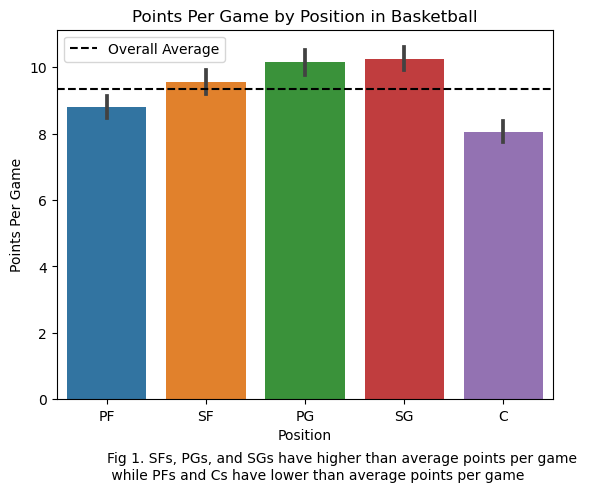

In [3]:
average_points = player_game['pts_per_game'].mean()

plt.figure()
sns.barplot(x="pos", y='pts_per_game', data=player_game)
plt.axhline(y=average_points, color='black', linestyle='--', label='Overall Average')

plt.xlabel('Position')
plt.ylabel('Points Per Game')
plt.title('Points Per Game by Position in Basketball')

plt.legend()
plt.text(0, -2.4, "Fig 1. SFs, PGs, and SGs have higher than average points per game \n while PFs and Cs have lower than average points per game ")

plt.show()


In [4]:
series_sg = player_game[(player_game['pos'] == 'SG')]["pts_per_game"]
series_c = player_game[(player_game['pos'] == 'C')]["pts_per_game"]
series_pg = player_game[(player_game['pos'] == 'PG')]["pts_per_game"]
series_pf = player_game[(player_game['pos'] == 'PF')]["pts_per_game"]
series_sf = player_game[(player_game['pos'] == 'SF')]["pts_per_game"]

series_control = player_game["pts_per_game"]


p_val_sg = stats.ttest_ind(series_sg, series_control).pvalue
p_val_c = stats.ttest_ind(series_c, series_control).pvalue
p_val_pg = stats.ttest_ind(series_pg, series_control).pvalue
p_val_pf = stats.ttest_ind(series_pf, series_control).pvalue
p_val_sf = stats.ttest_ind(series_sf, series_control).pvalue

# Create a DataFrame for the table
data = {
    'Position': ['SG', 'C', 'PG', 'PF', 'SF'],
    'P-Value': [2 * p_val_sg, 2 * p_val_c, 2 * p_val_pg, 2 * p_val_pf, 2 * p_val_sf]
}

df_table = pd.DataFrame(data)

# Print the table
print(df_table.to_markdown(index=False))

| Position   |     P-Value |
|:-----------|------------:|
| SG         | 4.797e-06   |
| C          | 1.33121e-11 |
| PG         | 0.000144059 |
| PF         | 0.0078991   |
| SF         | 0.621759    |


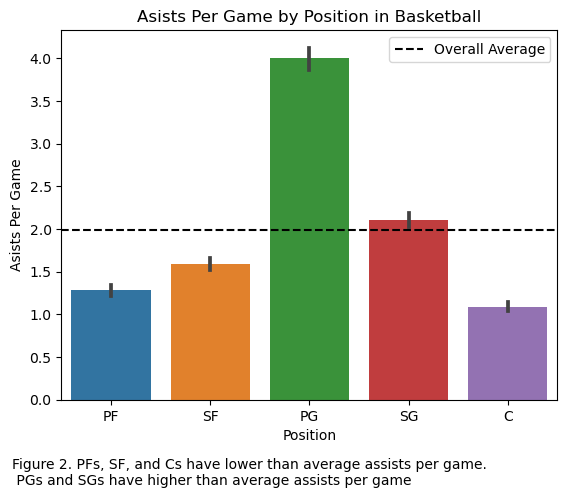

In [5]:
average_assists = player_game['ast_per_game'].mean()

plt.figure()
sns.barplot(x="pos", y='ast_per_game', data=player_game)
plt.axhline(y=average_assists, color='black', linestyle='--', label='Overall Average')

plt.xlabel('Position')
plt.ylabel('Asists Per Game')
plt.title('Asists Per Game by Position in Basketball')

plt.legend()
plt.text(-1,-1, "Figure 2. PFs, SF, and Cs have lower than average assists per game. \n PGs and SGs have higher than average assists per game")

plt.show()


In [6]:
series_c_ast = player_game[(player_game['pos'] == 'C')]["ast_per_game"]
series_pf_ast = player_game[(player_game['pos'] == 'PF')]["ast_per_game"]
series_pg_ast = player_game[(player_game['pos'] == 'PG')]["ast_per_game"]
series_sf_ast = player_game[(player_game['pos'] == 'SF')]["ast_per_game"]
series_sg_ast = player_game[(player_game['pos'] == 'SG')]["ast_per_game"]

series_control_ast = player_game["ast_per_game"]

pval_c = stats.ttest_ind(series_c_ast, series_control_ast).pvalue
pval_pf = stats.ttest_ind(series_pf_ast, series_control_ast).pvalue
pval_pg = stats.ttest_ind(series_pg_ast, series_control_ast).pvalue
pval_sf = stats.ttest_ind(series_sf_ast, series_control_ast).pvalue
pval_sg = stats.ttest_ind(series_sg_ast, series_control_ast).pvalue

print("C: ", 2*pval_c)
print("PF: ", 2*pval_pf)
print("PG: ", 2*pval_pg)
print("SF: ", 2*pval_sf)
print("SG: ",2* pval_sg)

C:  1.1199366460600257e-62
PF:  1.7037902544746848e-37
PG:  6.602676434791104e-214
SF:  4.603250791335261e-12
SG:  0.046420317153373615


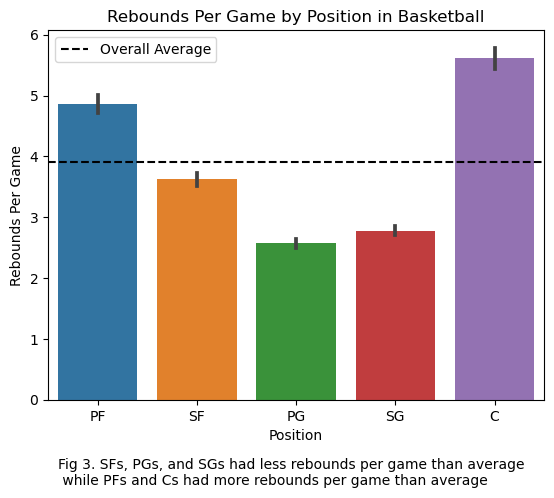

In [7]:
average_rebounds = player_game['trb_per_game'].mean()

plt.figure()
sns.barplot(x="pos", y='trb_per_game', data=player_game)
plt.axhline(y=average_rebounds, color='black', linestyle='--', label='Overall Average')

plt.xlabel('Position')
plt.ylabel('Rebounds Per Game')
plt.title('Rebounds Per Game by Position in Basketball')

plt.legend()
plt.text(-0.4,-1.4, "Fig 3. SFs, PGs, and SGs had less rebounds per game than average \n while PFs and Cs had more rebounds per game than average")

plt.show()

In [8]:
series_c_trb = player_game[(player_game['pos'] == 'C')]["trb_per_game"]
series_pf_trb = player_game[(player_game['pos'] == 'PF')]["trb_per_game"]
series_pg_trb = player_game[(player_game['pos'] == 'PG')]["trb_per_game"]
series_sf_trb = player_game[(player_game['pos'] == 'SF')]["trb_per_game"]
series_sg_trb = player_game[(player_game['pos'] == 'SG')]["trb_per_game"]

series_control_trb = player_game["trb_per_game"]

pval_c_rb = stats.ttest_ind(series_c_trb, series_control_trb).pvalue
pval_pf_rb = stats.ttest_ind(series_pf_trb, series_control_trb).pvalue
pval_pg_rb = stats.ttest_ind(series_pg_trb, series_control_trb).pvalue
pval_sf_rb = stats.ttest_ind(series_sf_trb, series_control_trb).pvalue
pval_sg_rb = stats.ttest_ind(series_sg_trb, series_control_trb).pvalue

print("C: ", 2*pval_c_rb)
print("PF: ", 2*pval_pf_rb)
print("PG: ", 2*pval_pg_rb)
print("SF: ", 2*pval_sf_rb)
print("SG: ", 2*pval_sg_rb)

C:  2.599096694807874e-95
PF:  7.739354126273956e-33
PG:  1.6354910490682282e-66
SF:  0.0008179627176389171
SG:  1.1753070164529216e-55


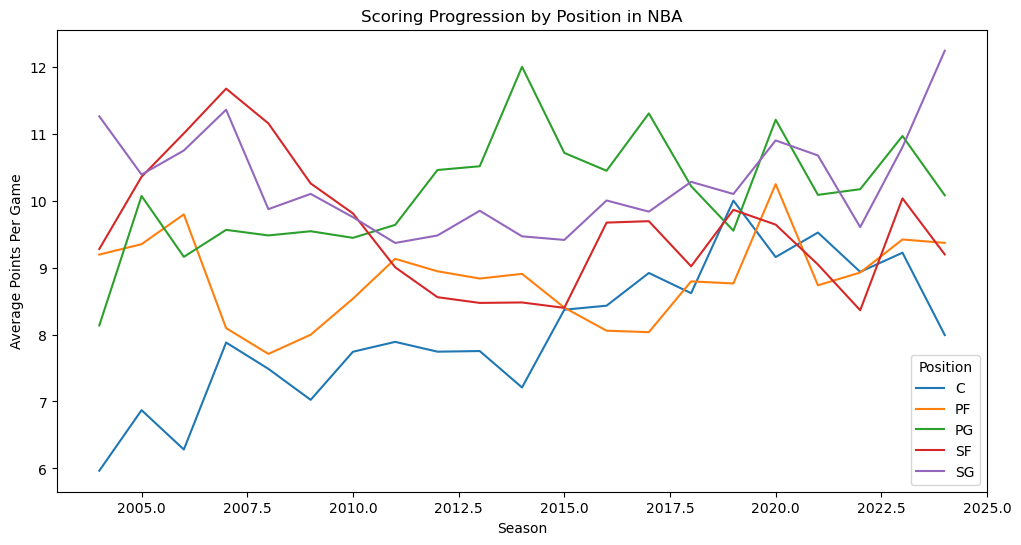

In [9]:
scoring_progression = player_game.groupby(['pos', 'season'])['pts_per_game'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='pts_per_game', hue='pos', data=scoring_progression)
plt.xlabel('Season')
plt.ylabel('Average Points Per Game')
plt.title('Scoring Progression by Position in NBA')
plt.legend(title='Position')
plt.show()


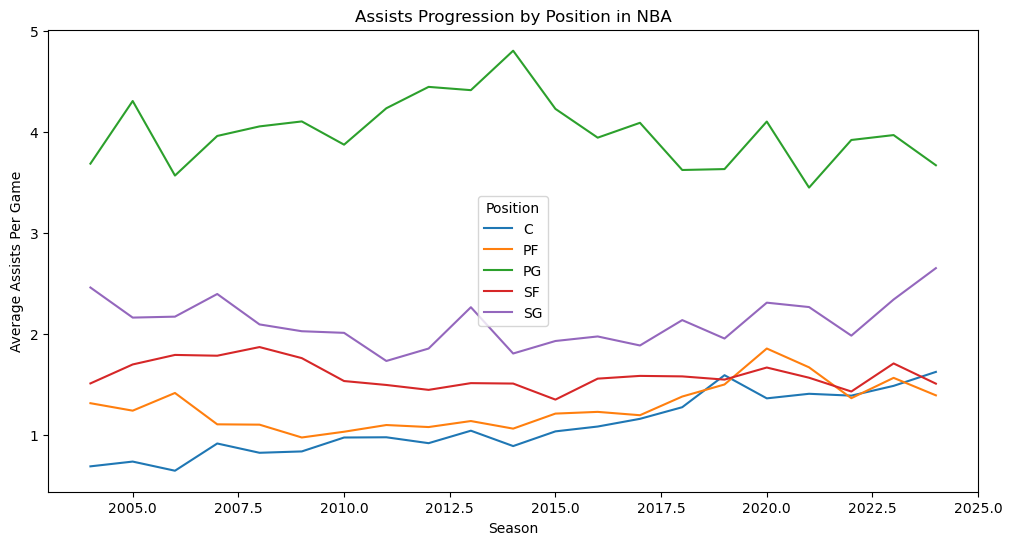

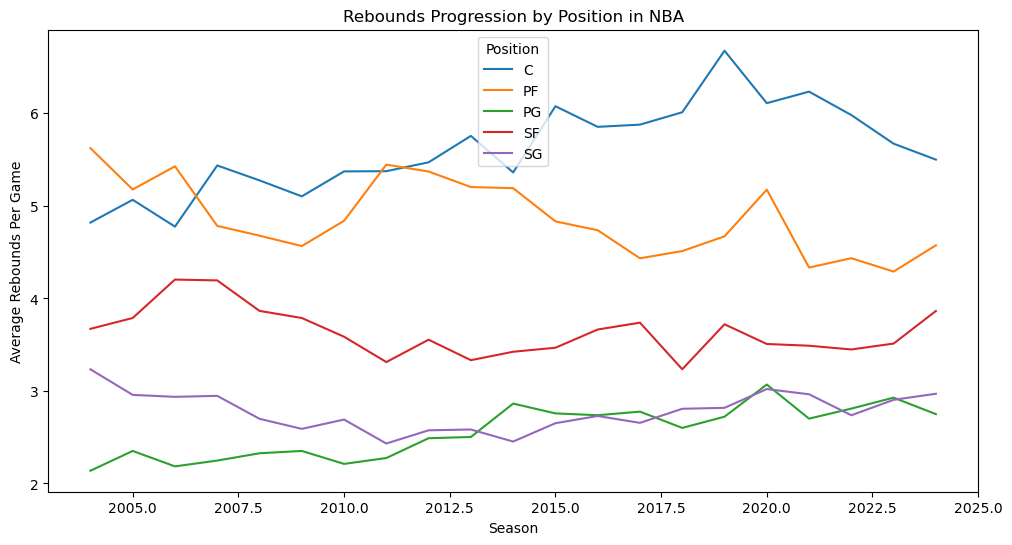

In [10]:
assists_progression = player_game.groupby(['pos', 'season'])['ast_per_game'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='ast_per_game', hue='pos', data=assists_progression)
plt.xlabel('Season')
plt.ylabel('Average Assists Per Game')
plt.title('Assists Progression by Position in NBA')
plt.legend(title='Position')
plt.show()

rebounds_progression = player_game.groupby(['pos', 'season'])['trb_per_game'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='season', y='trb_per_game', hue='pos', data=rebounds_progression)
plt.xlabel('Season')
plt.ylabel('Average Rebounds Per Game')
plt.title('Rebounds Progression by Position in NBA')
plt.legend(title='Position')
plt.show()


In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for Points Per Game across different positions
anova_model = ols('pts_per_game ~ pos', data=player_game).fit()
anova_results = sm.stats.anova_lm(anova_model, typ=2)
print(anova_results)



                 sum_sq      df          F        PR(>F)
pos         4356.616237     4.0  28.757474  1.026450e-23
Residual  233264.572705  6159.0        NaN           NaN


The ANOVA (Analysis of Variance) test is used to determine whether there are any statistically significant differences between the means of several independent (unrelated) groups. In our case, it's used to see if the average points per game differ significantly across basketball positions.


Sum of Squares (sum_sq): This value represents the total variation in the dataset. It's split into two parts:
- Between Groups (pos): The variation due to the differences between group means (different positions in this case). The sum of squares for 'pos' is 4356.616237.
- Residual: The variation within groups. The residual sum of squares is 233264.572705.

Degrees of Freedom (df): For 'pos', it's 4, which corresponds to the number of groups (positions) minus one. The residual degrees of freedom is 6159, calculated as the total number of observations minus the number of groups.

F-Statistic (F): The value of 28.757474 suggests the ratio of the variance between the groups to the variance within the groups. A higher value typically indicates that the group means are not all equal.

P-Value (PR(>F)): This is the probability of observing the data if the null hypothesis (that all group means are equal) is true. A p-value of approximately 1.026450e-23 (very close to 0) suggests that the group means are not all equal and that there is a statistically significant difference in points per game across different positions

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
X = pd.get_dummies(player_game[['pos', 'experience', 'num_seasons']], drop_first=True)
y = player_game['pts_per_game']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R^2 Score: 0.24795408266960206
Mean Squared Error: 28.23342838121674


R² Score (R^2 Score): This score is 0.24795408266960206, which means approximately 24.8% of the variance in the 'points per game' can be explained by the model. In other words, about a quarter of the variability in players' scoring is accounted for by their position, experience, and number of seasons played.
Mean Squared Error (MSE): The MSE is 28.23342838121674. This value is a measure of the average of the squares of the errors—i.e., the average squared difference between the estimated values and the actual value. A lower MSE indicates a better fit of the model to the data.